

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [76]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [77]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [78]:
df.shape

(10866, 21)

In [79]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Data Cleaning

As evident from the data, it seems we have genre and other attributes of data (like cast etc)  of the movie as string separated by | symbol. This needs to be converted into a suitable type (i.e to array) to use them in data visualization and other steps.

  

In [80]:
# Pandas read empty string value as nan, make it empty string
df.genres.fillna('', inplace=True)
df.production_companies.fillna('', inplace=True)

In [81]:
def string_to_array(data):
    """
        This function returns the result as array
    """
    x=data.split('|')
    
    return x

Convert genres and production comapnies to array

In [82]:
df.genres = df.genres.apply(string_to_array)

In [83]:
df.production_companies = df.production_companies.apply(string_to_array)

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ((Which genres are most popular from year to year?

Since popularity column indicates popularity of the movie. We can measure popularty of a movie based on average vote.If vote_average>=7,the movie is considered popular.
On analyzing the popular movies since 1960(check illustrations below), following observations can be made:
•	Almost all popular movies have Drama genre
•	Over the time Comedy, Action and Adventure got popular
•	In latest years, Documentry, Action and Animation movies gained more popularity

In [84]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [85]:
def popular_movies(movies):
    return movies[movies['vote_average']>=7]

In [86]:
def group_by_genre(data):
    """
        This function takes a Data Frame and returns a dictionary having
        release_year as key and a dictionary having key as movie's genre
        and value as frequency of the genre that year
    """
    genres_by_year = {}
    for (year, position), genres in data.items():
        for genre in genres:
            if year in genres_by_year:
                if genre in genres_by_year[year]:
                    genres_by_year[year][genre] += 1
                else:
                    genres_by_year[year][genre] = 1
            else:
                genres_by_year[year] = {}
                genres_by_year[year][genre] = 1
    return genres_by_year
            

In [87]:
def plot(genres_by_year):
    """
        This function iterates over each row of Data Frame and prints rows
        having release_year divisible by 5 to avoid too many graphs.
    """
    for year, genres in genres_by_year.items():
        if year%5 == 0:
            pd.DataFrame(grouped_genres[year], index=[year]).plot(kind='bar', figsize=(20, 6))

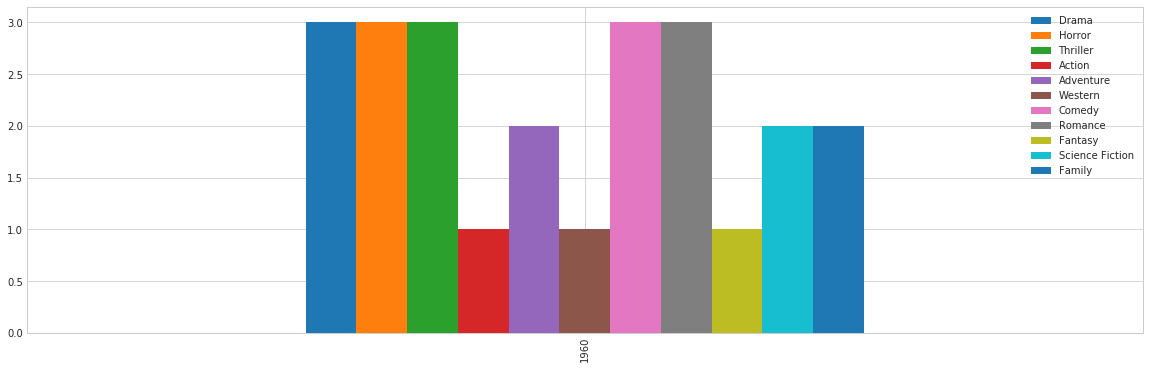

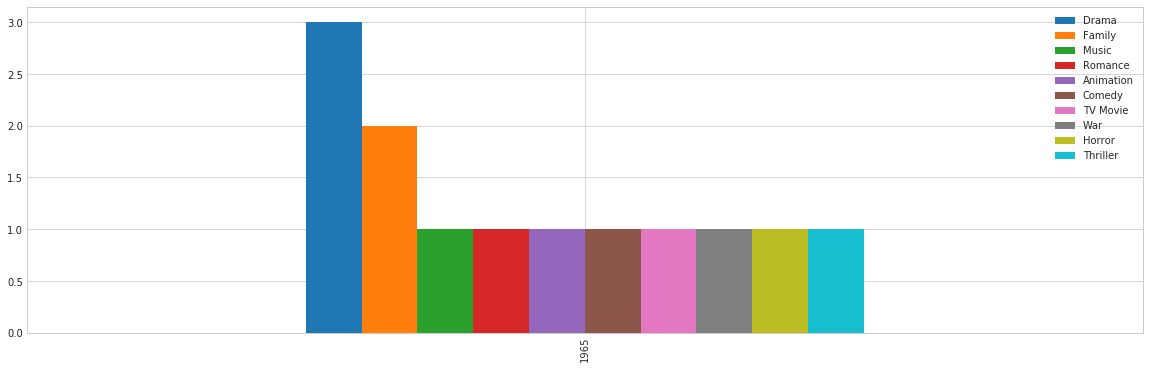

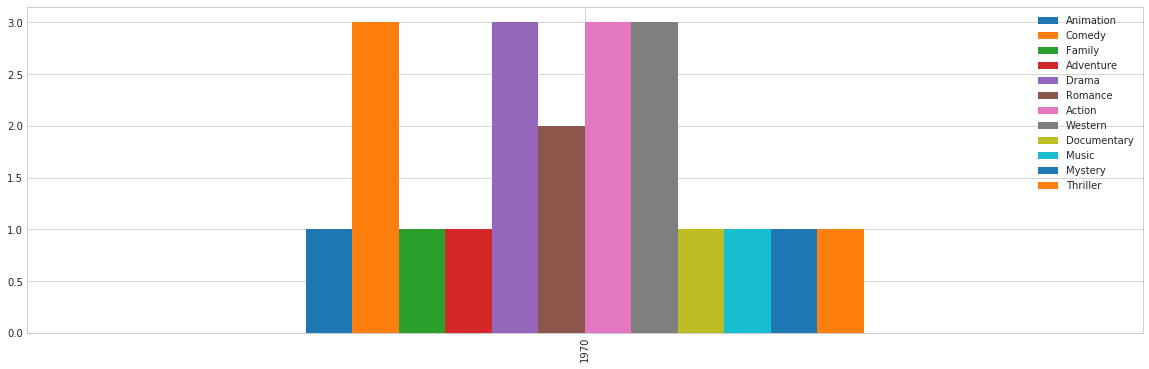

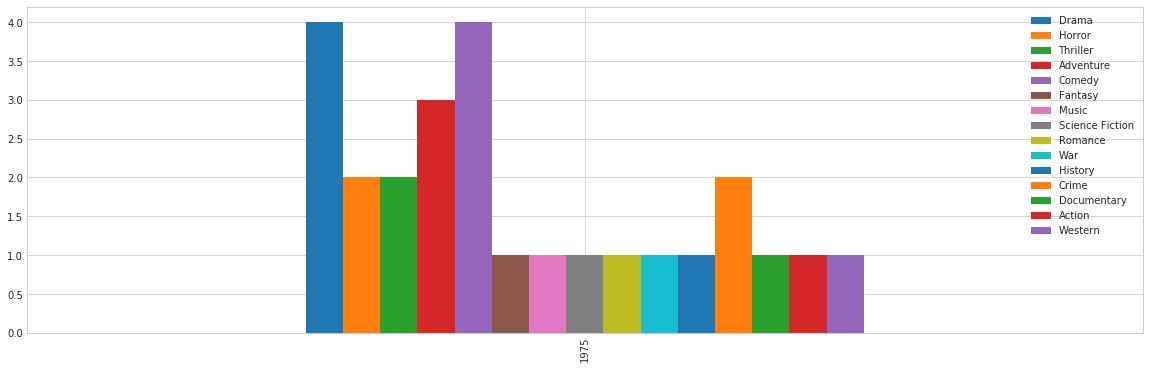

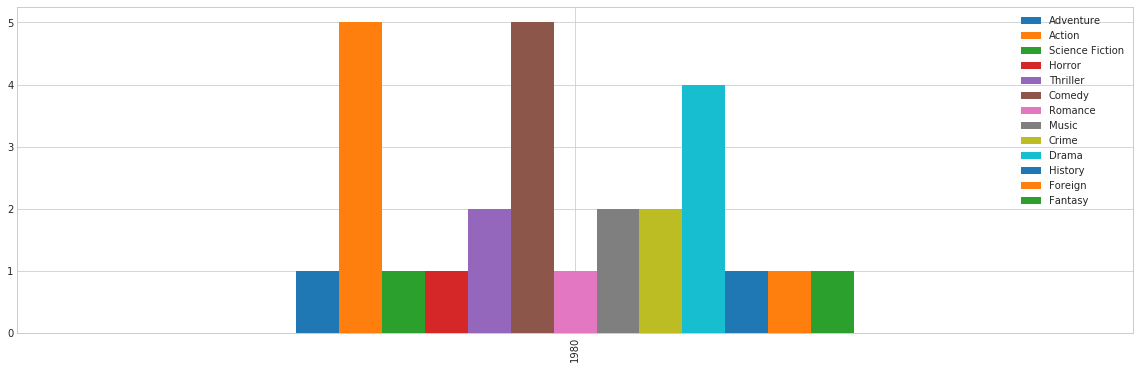

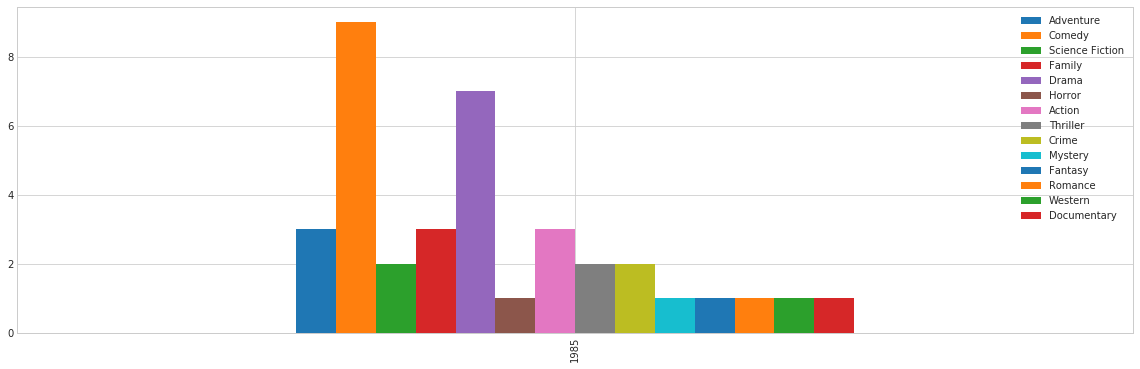

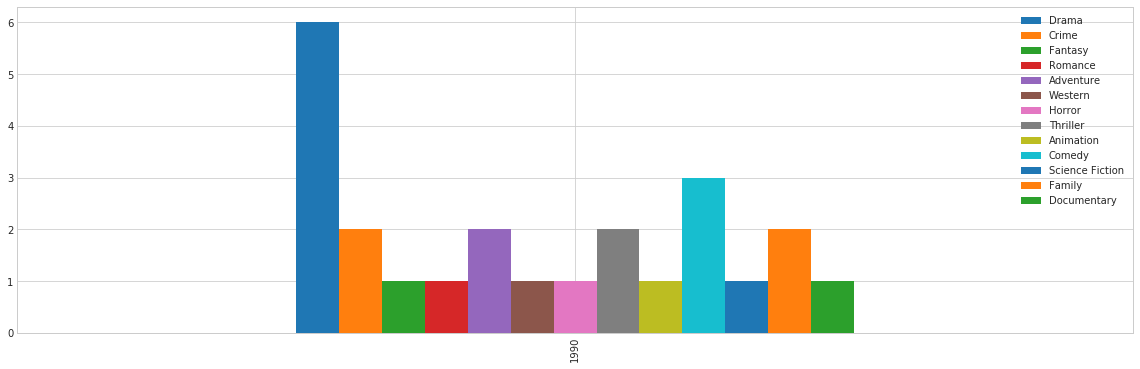

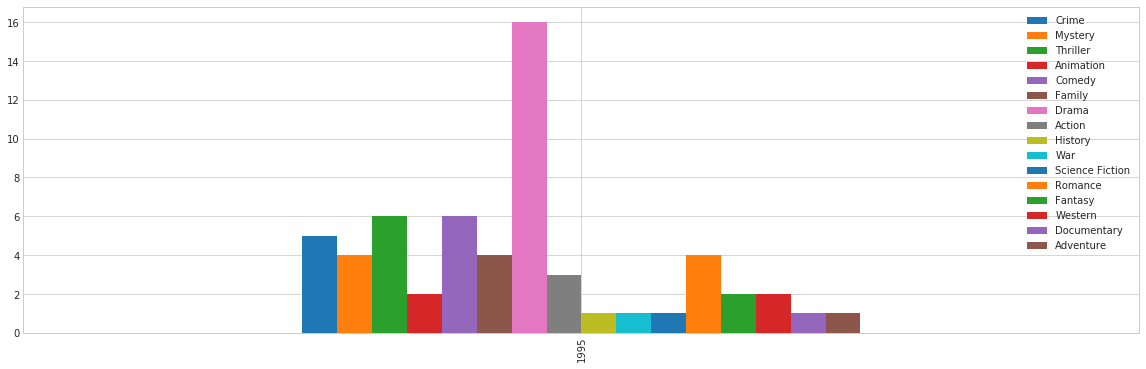

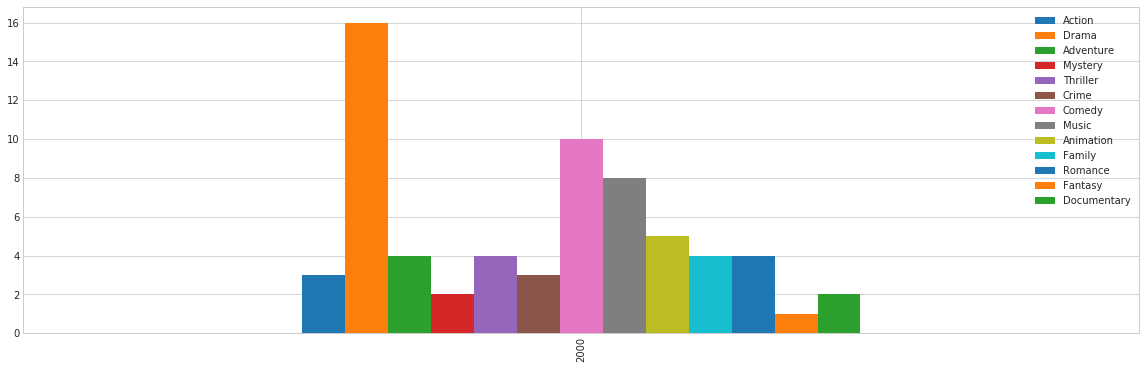

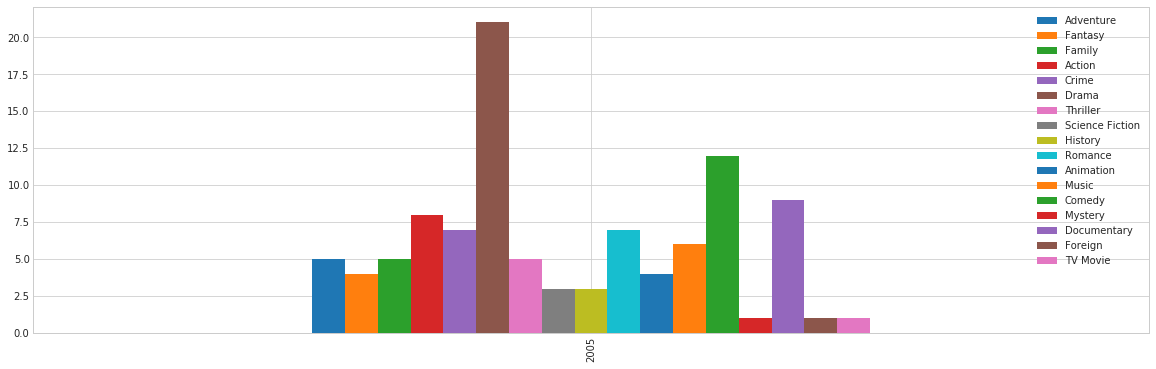

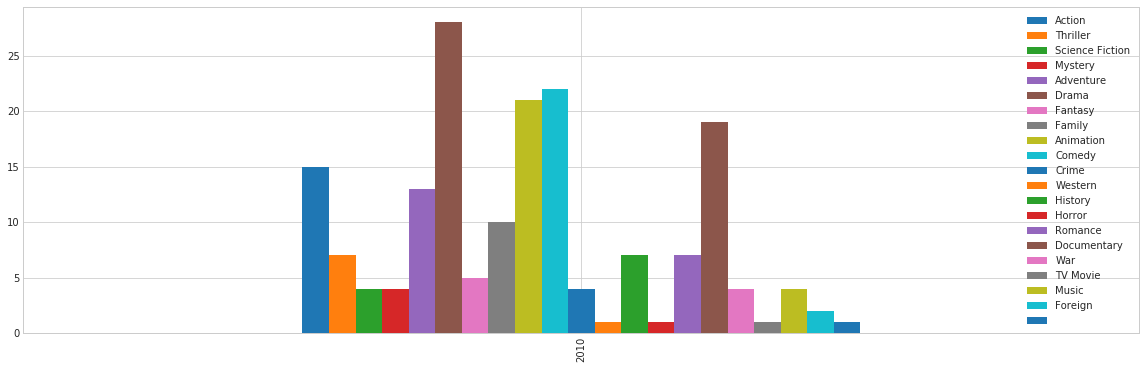

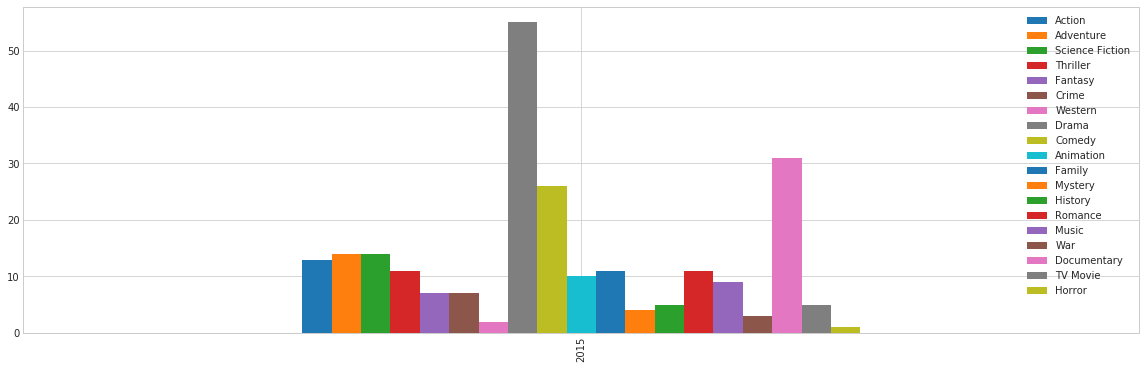

In [88]:
# Group movies by genre for each year and try to find the correlations
# of genres over years.
grouped_genres = group_by_genre(df.groupby('release_year').apply(popular_movies).genres)
plot(grouped_genres)

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?


We can consider those movies with at least 1 billion revenue and see what are the common features among them

Considering this criteria and based on illustrations below, we can make following observations about high revenue movies:

    
Adventure and Action are most common genres among these movies followed by Science Fiction, Fantasy and Family.

Budget vs Revenue(Correlation = 0.66)
     The movies with higher investments results in better revenues
    
Popularity vs Revenue (Correlation = 0.73)
   The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of 
the movie may be high.

Vote Average vs Revenue (Correlation = 0.17)
   So vote average is not highly related to the revenue.
    
Runtime vs Revenue (Correlation = 0.16)
    So runtime is not highly related to the revenue.


In [92]:

high_rev_movies = df[df['revenue_adj'] >= 1000000000]\
                            .sort_values(by='revenue_adj', ascending=False)
high_rev_movies.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,"[Adventure, Action, Science Fiction]","[Lucasfilm, Twentieth Century Fox Film Corpora...",3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,"[Drama, Horror, Thriller]","[Warner Bros., Hoya Productions]",12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,"[Horror, Thriller, Adventure]","[Universal Pictures, Zanuck/Brown Productions]",6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09


Find common genres in high revenue movies

In [93]:
def count_frequency(data):
    frequency_count = {}
    for items in data:
        for item in items:
            if item in frequency_count:
                frequency_count[item] += 1
            else:
                frequency_count[item] = 1
    return frequency_count

{'Action': 23, 'Adventure': 32, 'Fantasy': 15, 'Science Fiction': 16, 'Drama': 9, 'Romance': 2, 'Thriller': 9, 'Horror': 2, 'Family': 15, 'Crime': 5, 'Mystery': 1, 'Animation': 8, 'Comedy': 4, 'Music': 1}


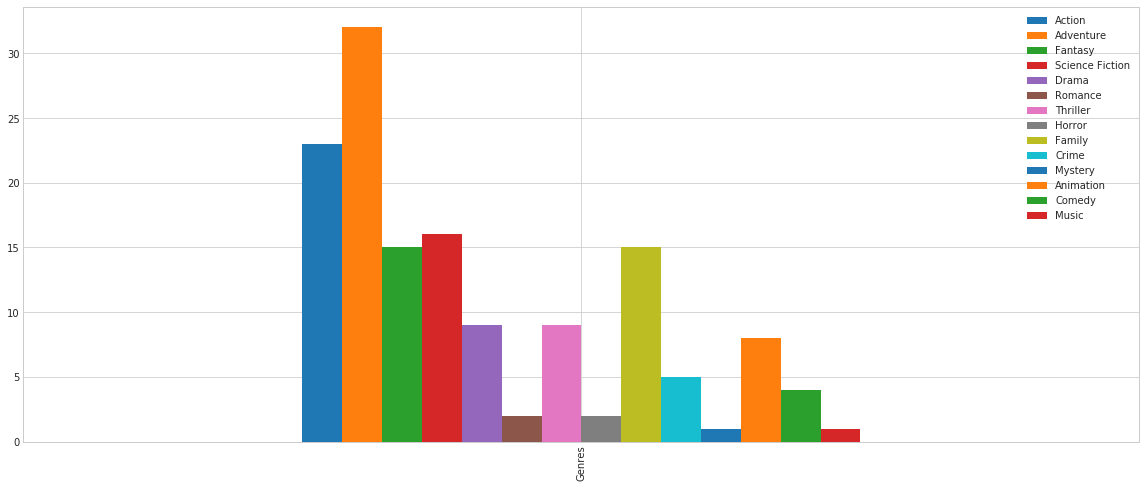

In [94]:
high_rev_genres = count_frequency(high_rev_movies.genres)
print(high_rev_genres)
pd.DataFrame(high_rev_genres, index=['Genres']).plot(kind='bar', figsize=(20, 8))

Popularity of high revenue movies

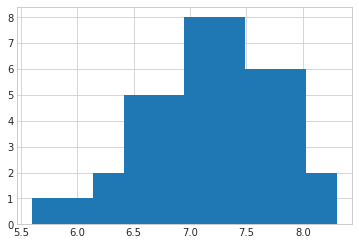

In [96]:
high_rev_movies.vote_average.hist()

Finding correlation among revenue and all other attributes

In [97]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


<a id='conclusions'></a>
## Conclusions

Drama genre is common traits among popular movies with Comedy, Action, Adventure and Animation getting popular in latest years.
Drame, Comedy, Thriller and Action are four most-made genres.
Revenue is directly connected to the budget.
Movies with higher budgets have shown a corresponding increase in the revenues.
The gap between gross budget and revenue have increased over years.
There seems to be correlation between high revenue movies and Adventure & Action genres. Also High revenue movies are correlated with high popularity.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0